# Computer vision & CNNs: Cats vs. Dogs

This notebook is designed to provide similar code and output that is observed in the https://misk-data-science.github.io/misk-dl/notebooks/05-cats-vs-dogs.nb.html R notebook.

## Required packages

In [1]:
# general helper libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

# deep learning functionality
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

## Data Preparation

### Image location

```
- data
   └── dogs-vs-cats
       └── train
           └── cats
               ├── cat.1.jpg
               ├── cat.2.jpg
               └── ...
           └── dogs
               ├── dog.1.jpg
               ├── dog.2.jpg
               └── ...
       └── validation
           ├── cats
           └── dogs
       └── test
           ├── cats
           └── dogs
```

In [2]:
image_dir = os.path.join(os.path.dirname(os.getcwd()), 'data', 'dogs-vs-cats')
image_dir

'/Users/b294776/Desktop/Workspace/Projects/misk/misk-dl/materials/data/dogs-vs-cats'

In [3]:
train_dir = os.path.join(image_dir, 'train')
valid_dir = os.path.join(image_dir, 'validation')
test_dir = os.path.join(image_dir, 'test')

# create train, validation, and test file paths for cat images
train_cats_dir = os.path.join(train_dir, 'cats')
valid_cats_dir = os.path.join(valid_dir, 'cats')
test_cats_dir = os.path.join(test_dir, 'cats')

# create train, validation, and test file paths for dog images
train_dogs_dir = os.path.join(train_dir, 'dogs')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')

### Data set

In [4]:
print(f'''Cat images:
  - total training cat images: {len(os.listdir(train_cats_dir))}
  - total validation cat images: {len(os.listdir(valid_cats_dir))}
  - total test cat images: {len(os.listdir(test_cats_dir))}
''')

print(f'''Dog images:
  - total training dog images: {len(os.listdir(train_dogs_dir))}
  - total validation dog images: {len(os.listdir(valid_dogs_dir))}
  - total test dog images: {len(os.listdir(test_dogs_dir))}
''')

Cat images:
  - total training cat images: 1000
  - total validation cat images: 500
  - total test cat images: 500

Dog images:
  - total training dog images: 1000
  - total validation dog images: 500
  - total test dog images: 500



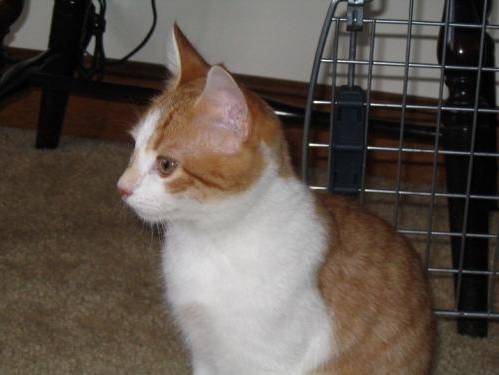

In [5]:
# show first cat image
img_path = os.path.join(train_cats_dir, os.listdir(train_cats_dir)[0])
Image.open(img_path)

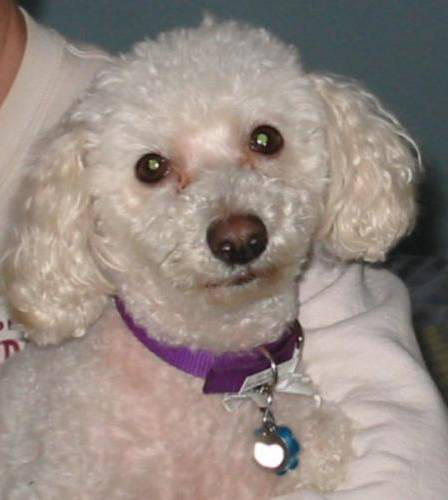

In [6]:
# show first dog image
img_path = os.path.join(train_dogs_dir, os.listdir(train_dogs_dir)[0])
Image.open(img_path)

## CNN with image generator

### Define and compile model

In [7]:
model = models.Sequential()

# feature detector portion of model
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# classifier portion of model
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

2021-10-28 20:28:23.432014: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### Read images from directories

In [9]:
train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Train the model

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=EarlyStopping(patience=5)
)

Epoch 1/30


2021-10-28 20:28:23.888996: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


100/100 [==============================] - 39s 377ms/step - loss: 0.6940 - accuracy: 0.5155 - val_loss: 0.6798 - val_accuracy: 0.5080
Epoch 2/30
100/100 [==============================] - 40s 400ms/step - loss: 0.6609 - accuracy: 0.6075 - val_loss: 0.6505 - val_accuracy: 0.6070
Epoch 3/30
100/100 [==============================] - 38s 384ms/step - loss: 0.6111 - accuracy: 0.6680 - val_loss: 0.6313 - val_accuracy: 0.6350
Epoch 4/30
100/100 [==============================] - 39s 390ms/step - loss: 0.5748 - accuracy: 0.7005 - val_loss: 0.5848 - val_accuracy: 0.6900
Epoch 5/30
100/100 [==============================] - 42s 423ms/step - loss: 0.5361 - accuracy: 0.7255 - val_loss: 0.5851 - val_accuracy: 0.6850
Epoch 6/30
100/100 [==============================] - 38s 378ms/step - loss: 0.5106 - accuracy: 0.7580 - val_loss: 0.5697 - val_accuracy: 0.7000
Epoch 7/30
100/100 [==============================] - 38s 376ms/step - loss: 0.4867 - accuracy: 0.7665 - val_loss: 0.5762 - val_accuracy: 0.6

<AxesSubplot:>

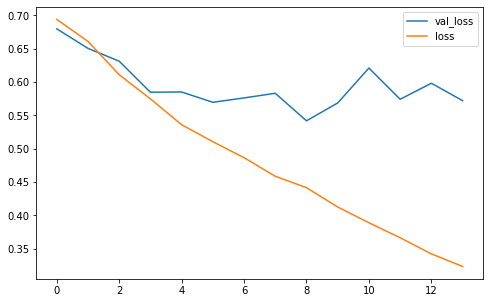

In [11]:
results = pd.DataFrame(history.history)

# plot loss
results[['val_loss', 'loss']].plot(figsize=(8, 5))

<AxesSubplot:>

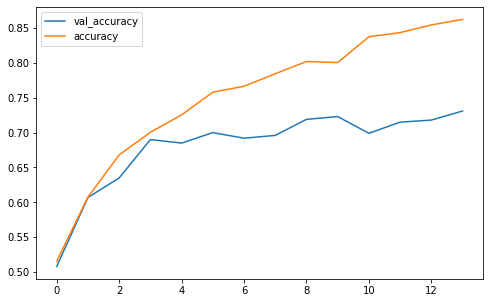

In [12]:
# plot accuracy
results[['val_accuracy', 'accuracy']].plot(figsize=(8, 5))

## CNN with Image Augmentation

### Image Augmentation

In [13]:
datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

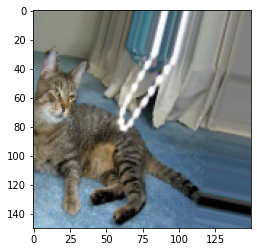

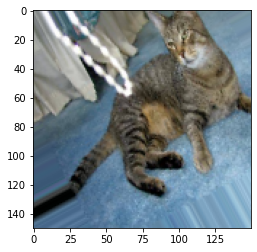

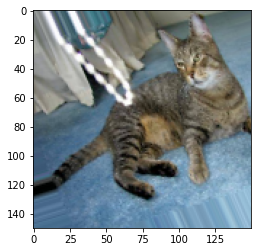

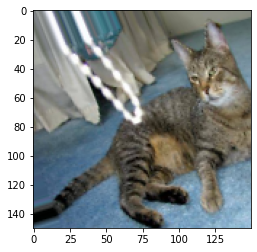

In [14]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# choose a single image
img_path = fnames[3]

# load and resize the image
img = image.load_img(img_path, target_size=(150, 150))

# converts to a numpy array
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# generates batches of randomly transformed images based on
# our predefined datagen ImageDataGenerator
i =0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### Build & train model

In [15]:
model = models.Sequential()

# feature detector portion of model
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# classifier portion of model
model.add(layers.Flatten())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# only augment training data
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# do not augment test and validation data
test_datagen = ImageDataGenerator(rescale=1/255)

# generate batches of data from training directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# generate batches of data from validation directory
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=EarlyStopping(patience=5),
    verbose=False
)

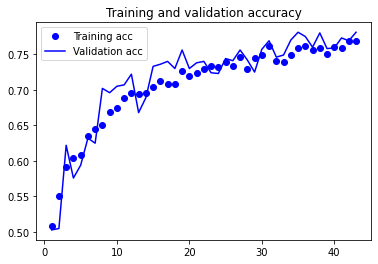

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

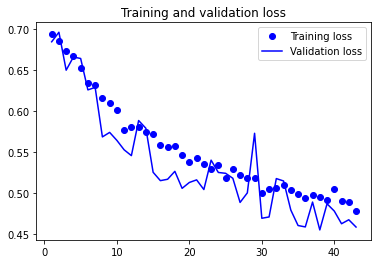

In [19]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

### Save the model

In [20]:
model.save('cats_and_dogs_small_1.h5')